# (1.0) Установка пакетов

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# (1.1) Список датафреймов

X1 - исходный датафрейм  
X1_N - датафрейм с нормированными переменными  
X1_N_PCA - датафрейм с нормированными переменными и с новой переменной, созданной на основании скоррелированных переменных  
X1_N_COR - датафрейм с нормированными переменными с удаленными скоррелированными переменными

# (1.1) Загрузка данных

In [22]:
X1 = pd.read_csv('ML.csv', sep=";")
X1.head(1)

,SIGNAL_ID,TRADEDATE,CROSSTURNOVER1,CROSSDEALRATIOS,EPSILONE,PROFITPL,PROFITABILITYY,SIGNALSK,RATINGCROSSDEALRATIOS,RATINGEPSILONE,...,RATINGAVGLIFETIME,RATINGAGTDEVPRICE,RATINGAGTDEVVOL,RATINGCROSSTURNOVER1,RATINGCROSSTURNOVER2,RATINGCROSSVALUE,USERGRADE_ID,SHORTNAME,IDENT,DETECTION_ID
0,2.183220e+11,03.18.2019 15:01:21,1.0,24.0,0.0,2290.0,1.0,3.0,24.0,0.0,...,100.0,NaN,NaN,NaN,NaN,NaN,4.0,TRNF-3.19,FORTS,238 944


# (1.2) Удаление лишних переменных

In [23]:
# удаляем рейтинги
X1 = X1.drop(['RATINGCROSSDEALRATIOS','RATINGEPSILONE','RATINGPROFITPL','RATINGPROFITABILITYY',
              'RATINGSIGNALSK','RATINGINTEGRAL','RATINGDEV','RATINGAVGLIFETIME','RATINGAGTDEVPRICE',
              'RATINGAGTDEVVOL','RATINGCROSSTURNOVER1','RATINGCROSSTURNOVER2','RATINGCROSSVALUE'], axis=1)
X1.head(1)

,SIGNAL_ID,TRADEDATE,CROSSTURNOVER1,CROSSDEALRATIOS,EPSILONE,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_BS,AGTDEV_PRICE,AGTDEV_VOL,TRADEDATE_LAST,EVENT_ID,CROSSTURNOVER2,CROSSVALUE,AVGLIFETIME,USERGRADE_ID,SHORTNAME,IDENT,DETECTION_ID
0,2.183220e+11,03.18.2019 15:01:21,1.0,24.0,0.0,2290.0,1.0,3.0,0.0,0.0,0.0,03.18.2019 15:52:48,NaN,0.0,1732440.0,NaN,4.0,TRNF-3.19,FORTS,238 944


In [24]:
# удаляем указание инструмента
X1 = X1.drop(['IDENT','SHORTNAME'], axis=1)
X1.head(1)

,SIGNAL_ID,TRADEDATE,CROSSTURNOVER1,CROSSDEALRATIOS,EPSILONE,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_BS,AGTDEV_PRICE,AGTDEV_VOL,TRADEDATE_LAST,EVENT_ID,CROSSTURNOVER2,CROSSVALUE,AVGLIFETIME,USERGRADE_ID,DETECTION_ID
0,2.183220e+11,03.18.2019 15:01:21,1.0,24.0,0.0,2290.0,1.0,3.0,0.0,0.0,0.0,03.18.2019 15:52:48,NaN,0.0,1732440.0,NaN,4.0,238 944


In [25]:
# удаляем лишние переменные
X1 = X1.drop(['DETECTION_ID','EVENT_ID','SIGNAL_ID'], axis=1)
X1.head(1)

,TRADEDATE,CROSSTURNOVER1,CROSSDEALRATIOS,EPSILONE,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_BS,AGTDEV_PRICE,AGTDEV_VOL,TRADEDATE_LAST,CROSSTURNOVER2,CROSSVALUE,AVGLIFETIME,USERGRADE_ID
0,03.18.2019 15:01:21,1.0,24.0,0.0,2290.0,1.0,3.0,0.0,0.0,0.0,03.18.2019 15:52:48,0.0,1732440.0,NaN,4.0


In [6]:
# ищем переменные с нулевой вариацией
for col in list(X1.columns):
        print(col, X1[col].unique())
        print()

TRADEDATE ['03.18.2019 15:01:21' '03.19.2019 10:00:07' '03.07.2019 16:31' ...
 '01.22.2019 21:10:08' '10.31.2018 16:03:07' '10.26.2018 14:26:38']

CROSSTURNOVER1 [1.]

CROSSDEALRATIOS [ 24.   3.   2.   4.   6.   1.  18.  40.  15.   5.   8.  59.   9.   7.
  23.  19. 100.  17.  16.  10.  11.  22.  12.  13.   0.  57.  14.  50.
  67.  28.  95.  31.  33.  21.  20.  41.  92.  74.  73.  25.  45.  29.
  36.  26.  51.  60.  52.  43.  30.  69.  77.  34.  75.  53.  37.  38.
  44.  32.  65.  27.  35.  89.  80.  46.  86.  42.  87.  47.  71.  70.
  66.  99.  79.  48.  63.  62.  84.  98.  72.  76.  49.  55.  97. 200.
  88.  56.  82.  93.  54. 115.  39.  90.  78.  91.  81.  58.  94.  96.
  68.  61.]

EPSILONE [0.]

PROFITPL [ 2290.  8909.   788. ... 43622. 23929.  4300.]

PROFITABILITYY [  1.   0.   4.   2.  11.   3.  49.  18.   5.  24.  12.  13.  15.   6.
  20.  16.   8.   9.  14.   7.  26.  32.  30.  22.  10.  76.  37.  17.
  43.  21.  29.  28.  41.  25.  19.  27.  36.  45.  35.  23.  50.  63.
  48.

In [26]:
# удаляем переменные с нулевой вариацией
X1 = X1.drop(['CROSSTURNOVER1','EPSILONE','AGTDEV_BS','AVGLIFETIME'], axis=1)
X1.head(1)

,TRADEDATE,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_PRICE,AGTDEV_VOL,TRADEDATE_LAST,CROSSTURNOVER2,CROSSVALUE,USERGRADE_ID
0,03.18.2019 15:01:21,24.0,2290.0,1.0,3.0,0.0,0.0,03.18.2019 15:52:48,0.0,1732440.0,4.0


# (1.3) Преобразование переменных

In [27]:
# преобразуем объект в datetime и считаем длительность сигнала
X1['TRADEDATE_LAST'] = pd.to_datetime(pd.Series(X1['TRADEDATE_LAST']))
X1['TRADEDATE'] = pd.to_datetime(pd.Series(X1['TRADEDATE']))
X1['DELTA'] = X1['TRADEDATE_LAST']- X1['TRADEDATE']
X1 = X1.drop(['TRADEDATE_LAST','TRADEDATE'], axis=1)
X1['DELTA'] = [(X1.loc[i,'DELTA'].seconds) for i in range(len(X1.DELTA))]
X1.head(1)

,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_PRICE,AGTDEV_VOL,CROSSTURNOVER2,CROSSVALUE,USERGRADE_ID,DELTA
0,24.0,2290.0,1.0,3.0,0.0,0.0,0.0,1732440.0,4.0,3087


In [28]:
# создаем бинарную переменную на основании USERGRADE_ID (0 - шум, 1 - не шум)
# все, что имеет USERGRADE_ID 2 и 3, превращаем в NOISE = 0 Все, что имеет USERGRADE_ID 4, превращаем в NOISE = 1
X1['NOT_NOISE'] = np.where((X1.USERGRADE_ID == 2) | (X1.USERGRADE_ID == 3), 1, 0)
X1 = X1.drop(['USERGRADE_ID'], axis=1)
X1.head(1)

,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_PRICE,AGTDEV_VOL,CROSSTURNOVER2,CROSSVALUE,DELTA,NOT_NOISE
0,24.0,2290.0,1.0,3.0,0.0,0.0,0.0,1732440.0,3087,0


Нормируем переменные в соответствии со следующим преобразованием:   
$$\\F_i = \frac{f_i - \overline{f}} {St.dev(f)}$$

In [31]:
# создаем новый датафрейм с нормированными переменными
X1_N = pd.DataFrame()
X1_N['CROSSDEALRATIOS'] = [(X1.loc[i,'CROSSDEALRATIOS'] - X1['CROSSDEALRATIOS'].mean())/X1['CROSSDEALRATIOS'].std() for i in range(len(X1.CROSSDEALRATIOS))]
X1_N['PROFITPL'] = [(X1.loc[i,'PROFITPL'] - X1['PROFITPL'].mean())/X1['PROFITPL'].std() for i in range(len(X1.PROFITPL))]
X1_N['PROFITABILITYY'] = [(X1.loc[i,'PROFITABILITYY'] - X1['PROFITABILITYY'].mean())/X1['PROFITABILITYY'].std() for i in range(len(X1.PROFITABILITYY))]
X1_N['SIGNALSK'] = [(X1.loc[i,'SIGNALSK'] - X1['SIGNALSK'].mean())/X1['SIGNALSK'].std() for i in range(len(X1.SIGNALSK))]
X1_N['AGTDEV_PRICE'] = [(X1.loc[i,'AGTDEV_PRICE'] - X1['AGTDEV_PRICE'].mean())/X1['AGTDEV_PRICE'].std() for i in range(len(X1.AGTDEV_PRICE))]
X1_N['AGTDEV_VOL'] = [(X1.loc[i,'AGTDEV_VOL'] - X1['AGTDEV_VOL'].mean())/X1['AGTDEV_VOL'].std() for i in range(len(X1.AGTDEV_VOL))]
X1_N['CROSSTURNOVER2'] = [(X1.loc[i,'CROSSTURNOVER2'] - X1['CROSSTURNOVER2'].mean())/X1['CROSSTURNOVER2'].std() for i in range(len(X1.CROSSTURNOVER2))]
X1_N['CROSSVALUE'] = [(X1.loc[i,'CROSSVALUE'] - X1['CROSSVALUE'].mean())/X1['CROSSVALUE'].std() for i in range(len(X1.CROSSVALUE))]
X1_N['DELTA'] = [(X1.loc[i,'DELTA'] - X1['DELTA'].mean())/X1['DELTA'].std() for i in range(len(X1.DELTA))]
X1_N['NOT_NOISE'] = X1['NOT_NOISE']
X1_N.head(5)

,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_PRICE,AGTDEV_VOL,CROSSTURNOVER2,CROSSVALUE,DELTA,NOT_NOISE
0,0.448633,-0.019631,-0.368477,-0.502279,-1.15257,-1.14048,-0.290189,-0.056744,-0.710139,0
1,-0.473516,-0.016409,-0.368477,-0.512488,-1.15257,-1.14048,-0.290189,0.185901,3.524390,0
2,-0.517427,-0.020362,-0.368477,-0.502279,-1.15257,-1.14048,-0.290189,-0.092792,1.066029,0
3,-0.473516,-0.020132,-0.368477,-0.502279,-1.15257,-1.14048,-0.290189,-0.072149,2.874730,0
4,-0.429604,-0.019093,-0.385397,-0.512488,-1.15257,-1.14048,-0.290189,0.338598,-0.984827,1


In [32]:
X1_N.describe()

,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_PRICE,AGTDEV_VOL,CROSSTURNOVER2,CROSSVALUE,DELTA,NOT_NOISE
count,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6295.000000
mean,4.034289e-15,3.007920e-17,5.138013e-15,-3.563472e-15,-4.187842e-15,1.614669e-15,-3.632308e-15,1.014390e-16,1.246730e-16,0.028118
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.165322
min,-6.052511e-01,-2.074524e-02,-3.853970e-01,-5.124880e-01,-1.152570e+00,-1.140480e+00,-2.901893e-01,-1.056802e-01,-1.017260e+00,0.000000
25%,-4.735155e-01,-2.071847e-02,-3.515561e-01,-5.073834e-01,-1.152570e+00,-1.140480e+00,-2.901893e-01,-1.055028e-01,-8.428071e-01,0.000000
50%,-3.856918e-01,-2.063085e-02,-3.007946e-01,-4.767557e-01,3.483462e-01,2.029559e-01,-2.901893e-01,-1.048257e-01,-3.494934e-01,0.000000
75%,-7.830889e-02,-2.013095e-02,-1.146695e-01,-9.391018e-02,3.483462e-01,2.029559e-01,-2.901893e-01,-9.930869e-02,6.601656e-01,0.000000
max,8.177119e+00,7.724810e+01,1.196655e+01,2.785088e+00,1.849263e+00,1.546391e+00,3.445479e+00,3.485233e+01,3.933984e+00,1.000000


# (1.4) Корреляционная матрица

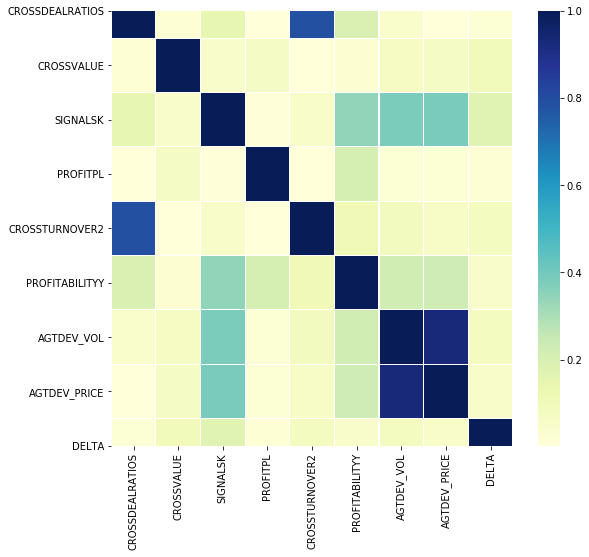

In [33]:
# Create correlation matrix
corr_matrix = X1_N[{'CROSSDEALRATIOS','PROFITPL','PROFITABILITYY','SIGNALSK',
    'AGTDEV_PRICE','AGTDEV_VOL','CROSSTURNOVER2','CROSSVALUE','DELTA'}].corr().abs()

# Select upper triangle of correlation matrix
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.95
#to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
#print(to_drop)
#print(corr_matrix)
#columns=['SIGNAL_ID', 'TRADEDATE', 'CROSSTURNOVER1', 'CROSSDEALRATIOS', 'EPSILONE', 'PROFITPL','PROFITABILITYY','SIGNALSK', 'RATINGCROSSDEALRATIOS', 'RATINGEPSILONE', 'RATINGPROFITPL', 'RATINGPROFITABILITYY', 'RATINGSIGNALSK', 'RATINGINTEGRAL','AGTDEV_BS', 'AGTDEV_PRICE', 'AGTDEV_VO', 'RATINGDEV', 'TRADEDATE_LAST', 'EVENT_ID','CROSSTURNOVER2','CROSSVALUE','AVGLIFETIME','RATINGAVGLIFETIME','USERGRADE_ID','SHORTNAME','IDENT','DETECTION_ID']
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corr_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [34]:
# создаем новый датафрейм (удаляем по одной из переменных из каждой скоррелированной пары):
# X1_N_COR - датафрейм с нормированными переменными с удаленными скоррелированными переменными
X1_N_COR = X1
X1_N_COR = X1_N_COR.drop(['AGTDEV_VOL','CROSSTURNOVER2'], axis=1)

# (1.5) Метод главных компонент

In [35]:
# создаем новую переменную с помощью метода главных компонент на основании скоррелированных переменных
# создаем список на основании скоррелированных переменных
x = X1_N.AGTDEV_VOL.values
y = X1_N.AGTDEV_PRICE.values
a = X1_N.CROSSTURNOVER2.values
b = X1_N.CROSSDEALRATIOS.values

xy = np.vstack((x,y))
ab = np.vstack((a,b))
# создаем компонену на основании скоррелированных переменных
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced1 = pca.fit_transform(np.transpose(xy))
XPCAreduced2 = pca.fit_transform(np.transpose(ab))

In [36]:
# создаем новый датафрейм:
# X1_N_PCA - датафрейм с нормированными переменными и с новой переменной, созданной на основании скоррелированных переменных
X1_N_PCA = X1_N
X1_N_PCA['AGTDEV'] = XPCAreduced1
X1_N_PCA['CROSS'] = XPCAreduced2
X1_N_PCA = X1_N_PCA.drop(['AGTDEV_VOL','CROSSTURNOVER2','AGTDEV_PRICE','CROSSDEALRATIOS'], axis=1)

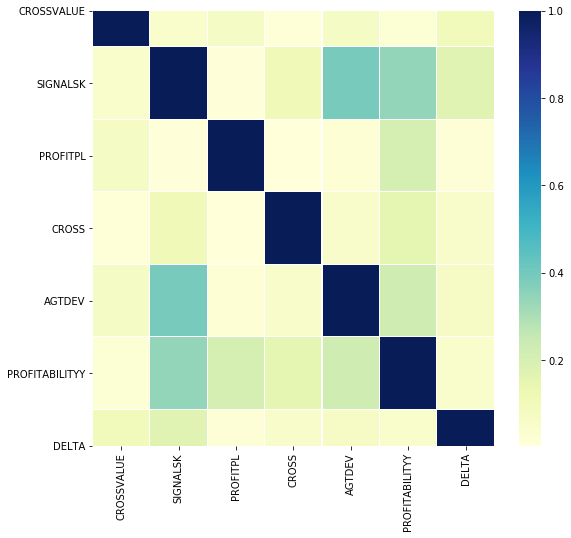

In [37]:
# Create correlation matrix
corr_matrix = X1_N_PCA[{'PROFITPL','PROFITABILITYY','SIGNALSK',
    'CROSSVALUE','DELTA','AGTDEV','CROSS'}].corr().abs()

# Select upper triangle of correlation matrix
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.95
#to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
#print(to_drop)
#print(corr_matrix)
#columns=['SIGNAL_ID', 'TRADEDATE', 'CROSSTURNOVER1', 'CROSSDEALRATIOS', 'EPSILONE', 'PROFITPL','PROFITABILITYY','SIGNALSK', 'RATINGCROSSDEALRATIOS', 'RATINGEPSILONE', 'RATINGPROFITPL', 'RATINGPROFITABILITYY', 'RATINGSIGNALSK', 'RATINGINTEGRAL','AGTDEV_BS', 'AGTDEV_PRICE', 'AGTDEV_VO', 'RATINGDEV', 'TRADEDATE_LAST', 'EVENT_ID','CROSSTURNOVER2','CROSSVALUE','AVGLIFETIME','RATINGAVGLIFETIME','USERGRADE_ID','SHORTNAME','IDENT','DETECTION_ID']
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corr_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

# (1.6) Делим выборку на train и test

In [40]:
# выделяем NOT_NOISE в отдельный датафрейм и удаляем из исходного
y1_n = pd.DataFrame(X1_N['NOT_NOISE'], columns=['NOT_NOISE'])
X1_N = X1_N.drop(['NOT_NOISE'], axis=1)
X1_N_PCA = X1_N_PCA.drop(['NOT_NOISE'], axis=1)
X1_N_COR = X1_N_COR.drop(['NOT_NOISE'], axis=1)

KeyError: 'NOT_NOISE'

In [41]:
# создаем из всех датафреймов тренировочную и тестовую выборку
x_n_train, x_n_test, y_n_train, y_n_test = train_test_split(X1_N, y1_n, test_size=0.30, random_state = 123)
x_n_pca_train, x_n_pca_test, y_n_train, y_n_test = train_test_split(X1_N_PCA, y1_n, test_size=0.30, random_state = 123)
x_n_cor_train, x_n_cor_test, y_n_train, y_n_test = train_test_split(X1_N_COR, y1_n, test_size=0.30, random_state = 123)

# (1.7) Logit

In [131]:
from sklearn import linear_model as slm, datasets, preprocessing
logit = slm.LogisticRegressionCV(cv = 5, n_jobs = -1)
roc_auc_log = []

### X1_N

In [132]:
# логит нельзя считать на данных, где между переменными есть корреляция
roc_auc_log.append(0)

### X1_N_PCA

In [133]:
%%time
logit.fit(x_n_pca_train, y_n_train)
predicted_prob = logit.predict_proba(x_n_pca_test)
roc_auc = metrics.roc_auc_score(y_n_test, logit.predict(x_n_pca_test))
roc_auc_log.append(roc_auc)
print(roc_auc)

predicted_results = []
for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_pca_test.index.tolist()
x1_log = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))

# записываем вероятность попадания в класс 1 в новый датафрейм
x1_log = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_log = x1_log.rename(columns = {0:'PROB_N_PCA_LOG_CV'})

/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6031256497331763
CPU times: user 64.3 ms, sys: 5.57 ms, total: 69.9 ms
Wall time: 256 ms


### X1_N_COR

In [134]:
%%time
logit.fit(x_n_cor_train, y_n_train)

predicted_prob = logit.predict_proba(x_n_cor_test)
roc_auc = metrics.roc_auc_score(y_n_test, logit.predict(x_n_cor_test))
roc_auc_log.append(roc_auc)
print(roc_auc)

predicted_results = []
for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_cor_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_log_cor = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_log_cor = x1_log_cor.rename(columns = {0:'PROB_N_COR_LOG_CV'})

x1_log = pd.merge(x1_log, x1_log_cor, how='left', left_index=True, right_index=True)

/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5305576732044263
CPU times: user 48.2 ms, sys: 5.31 ms, total: 53.5 ms
Wall time: 332 ms


In [139]:
roc_auc_log1 = pd.DataFrame(roc_auc_log, index=['X1_N_CV','X1_N_PCA_CV','X1_N_COR_CV'])
roc_auc_log1 = roc_auc_log1.rename(columns = {0:'LOGIT'})
roc_auc_log1

,LOGIT
X1_N_CV,0.000000
X1_N_PCA_CV,0.603126
X1_N_COR_CV,0.530558


# (1.8) Random Forest

In [43]:
forest = RandomForestClassifier()

In [48]:
roc_auc_rf = []

### X1_N

#### Строим деревья с перебором параметров и кросс-валидацией

In [49]:
%%time
# перебор параметров
'''parameters = {'n_estimators': [200,400,500],
              'min_samples_leaf': [1, 3, 5, 7], 
              'max_depth': [5,10,15,20],
              'max_features': ['sqrt'],
              'min_samples_split': [18, 34, 44, 50],
              'min_samples_leaf': [12,28,50],
              'bootstrap': [True, False]
             }'''

# результаты поиска по сетке, для ускорения можно использовать сразу их
parameters = {'bootstrap': [False],
              'max_depth': [15], 
              'max_features': ['sqrt'], 
              'min_samples_leaf': [28],
              'min_samples_split': [50],
              'n_estimators': [200]}

forest_best = GridSearchCV(forest, parameters, cv = 5, verbose = 1, n_jobs=-1)
forest_best.fit(x_n_train, y_n_train)
predicted_prob = forest_best.predict_proba(x_n_test)
roc_auc = metrics.roc_auc_score(y_n_test, forest_best.predict(x_n_test))
x1_n_rf_best_params = forest_best.best_params_
print(roc_auc)
print(forest_best.best_params_)

roc_auc_rf.append(roc_auc)

predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_rf = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_rf = x1_rf.rename(columns = {0:'PROB_N_RF_CV'})

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.7119516251992515
{'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 28, 'min_samples_split': 50, 'n_estimators': 200}
CPU times: user 1.31 s, sys: 18.4 ms, total: 1.33 s
Wall time: 4.52 s


### X1_N_PCA

#### Строим деревья с перебором параметров и кросс-валидацией

In [50]:
%%time
# перебор параметров
parameters = {'n_estimators': [200,400,500],
              'min_samples_leaf': [1, 3, 5, 7], 
              'max_depth': [5,10,15,20],
              'max_features': ['sqrt'],
              'min_samples_split': [18, 34, 44, 50],
              'min_samples_leaf': [12,28,50],
              'bootstrap': [True, False]
             }

# результаты поиска по сетке, для ускорения можно использовать сразу их
'''parameters = {'bootstrap': False, 
              'max_depth': 10, 
              'max_features': 'sqrt', 
              'min_samples_leaf': 12, 
              'min_samples_split': 18, 
              'n_estimators': 400}'''

forest_best = GridSearchCV(forest, parameters, cv = 5, verbose = 1, n_jobs=-1)
forest_best.fit(x_n_pca_train, y_n_train)
predicted_prob = forest_best.predict_proba(x_n_pca_test)
roc_auc = metrics.roc_auc_score(y_n_test, forest_best.predict(x_n_pca_test))
x1_n_pca_rf_best_params = forest_best.best_params_
print(roc_auc)
print(forest_best.best_params_)

roc_auc_rf.append(roc_auc)

predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_pca_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_rf_cv = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_rf_cv = x1_rf_cv.rename(columns = {0:'PROB_N_PCA_RF_CV'})
# сливаем с предыдущим результатом
x1_rf = pd.merge(x1_rf, x1_rf_cv, how='left', left_index=True, right_index=True)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 23.8min finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.7220470349065539
{'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 18, 'n_estimators': 400}
CPU times: user 12.5 s, sys: 670 ms, total: 13.2 s
Wall time: 23min 53s


### X1_N_COR

#### Строим деревья с перебором параметров и кросс-валидацией

In [51]:
%%time
parameters = {'n_estimators': [200,400,500],
              'min_samples_leaf': [1, 3, 5, 7], 
              'max_depth': [5,10,15,20],
              'max_features': ['sqrt'],
              'min_samples_split': [18, 34, 44, 50],
              'min_samples_leaf': [12,28,50],
              'bootstrap': [True, False]
             }

# результаты поиска по сетке, для ускорения можно использовать сразу их
parameters = {'bootstrap': [False], 
              'max_depth': [10], 
              'max_features': ['sqrt'], 
              'min_samples_leaf': [12], 
              'min_samples_split': [34], 
              'n_estimators': [200]}

forest_best = GridSearchCV(forest, parameters, cv = 5, verbose = 1, n_jobs=-1)
forest_best.fit(x_n_cor_train, y_n_train)
predicted_prob = forest_best.predict_proba(x_n_cor_test)
roc_auc = metrics.roc_auc_score(y_n_test, forest_best.predict(x_n_cor_test))
x1_n_cor_rf_best_params = forest_best.best_params_
print(roc_auc)
print(forest_best.best_params_)

roc_auc_rf.append(roc_auc)

predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_cor_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_rf_cv = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_rf_cv = x1_rf_cv.rename(columns = {0:'PROB_N_COR_RF_CV'})
# сливаем с предыдущим результатом
x1_rf = pd.merge(x1_rf, x1_rf_cv, how='left', left_index=True, right_index=True)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 22.4min finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.7326853327788944
{'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 34, 'n_estimators': 200}
CPU times: user 10.3 s, sys: 608 ms, total: 10.9 s
Wall time: 22min 27s


In [140]:
# собираем roc_auc в один датафрейм
roc_auc_rf1 = pd.DataFrame(roc_auc_rf, index=['X1_N_CV','X1_N_PCA_CV','X1_N_COR_CV'])
roc_auc_rf1 = roc_auc_rf1.rename(columns = {0:'RANDOM_FOREST'})
roc_auc_rf1

,RANDOM_FOREST
X1_N_CV,0.711952
X1_N_PCA_CV,0.722047
X1_N_COR_CV,0.732685


In [54]:
# добавляем первый столбец с истинными значениями
x1_rf = pd.merge(y_n_test, x1_rf, how='left', left_index=True, right_index=True)
x1_rf

,NOT_NOISE,PROB_N_RF_CV,PROB_N_PCA_RF_CV,PROB_N_COR_RF_CV
4437,1,0.770944,0.880169,0.864014
1109,0,0.000000,0.000488,0.000047
1388,0,0.000025,0.000151,0.000148
5610,0,0.000000,0.000076,0.000228
5050,0,0.001372,0.000594,0.002387
...,...,...,...,...
4251,0,0.025292,0.053909,0.049389
5563,0,0.029727,0.051441,0.062129
5425,0,0.143213,0.045739,0.049811
5386,0,0.417996,0.401885,0.419331


# (1.9) Градиентный бустинг

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
boosting = GradientBoostingClassifier(random_state=123)
roc_auc_bo = []

### X1_N

#### Строим деревья с перебором параметров и кросс-валидацией

In [57]:
%%time
# перебор параметров
'''parameters = {'n_estimators': [100, 150, 200, 300], 
              'learning_rate': [0.1,0.5,1], 
              'max_depth': [3,5,7,10], 
              'min_samples_split': [2,5,7,10,15,20], 
              'min_samples_leaf': [1,2,5,7,10]}'''

# результаты поиска по сетке, для ускорения можно использовать сразу их
parameters = {'max_depth': [5], 
              'max_features': ['sqrt'], 
              'min_samples_leaf': [12], 
              'min_samples_split': [50], 
              'n_estimators': [200]}

boosting_best = GridSearchCV(boosting, parameters, cv = 5, verbose = 1, n_jobs=-1)
boosting_best.fit(x_n_train, y_n_train)
predicted_prob = boosting_best.predict_proba(x_n_test)
roc_auc = metrics.roc_auc_score(y_n_test, boosting_best.predict(x_n_test))
x1_n_rf_best_params = boosting_best.best_params_
print(roc_auc)
print(boosting_best.best_params_)

roc_auc_bo.append(roc_auc)

predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_bo = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_bo = x1_bo.rename(columns = {0:'PROB_N_BO_CV'})

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8049818652251254
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 50, 'n_estimators': 200}
CPU times: user 686 ms, sys: 24.2 ms, total: 710 ms
Wall time: 2.19 s


### X1_N_PCA

#### Строим деревья с перебором параметров и кросс-валидацией

In [58]:
%%time
# перебор параметров
parameters = {'n_estimators': [100, 150, 200, 300], 
              'learning_rate': [0.1,0.5,1], 
              'max_depth': [3,5,7,10], 
              'min_samples_split': [2,5,7,10,15,20], 
              'min_samples_leaf': [1,2,5,7,10]}

'''# результаты поиска по сетке, для ускорения можно использовать сразу их
parameters = {'learning_rate': [0.1], 
              'max_depth': [5], 
              'min_samples_leaf': [5], 
              'min_samples_split': [20], 
              'n_estimators': [200]}'''

boosting_best = GridSearchCV(boosting, parameters, cv = 5, verbose = 1, n_jobs=-1)
boosting_best.fit(x_n_pca_train, y_n_train)
predicted_prob = boosting_best.predict_proba(x_n_pca_test)
roc_auc = metrics.roc_auc_score(y_n_test, boosting_best.predict(x_n_pca_test))
x1_n_pca_rf_best_params = boosting_best.best_params_
print(roc_auc)
print(boosting_best.best_params_)

roc_auc_bo.append(roc_auc)

predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_pca_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_bo_cv = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_bo_cv = x1_rf_cv.rename(columns = {0:'PROB_N_PCA_BO_CV'})
# сливаем с предыдущим результатом
x1_bo = pd.merge(x1_bo, x1_bo_cv, how='left', left_index=True, right_index=True)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 41.9min finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:14

0.8047104211426064
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 200}
CPU times: user 43.1 s, sys: 2.84 s, total: 45.9 s
Wall time: 41min 56s


### X1_N_COR

#### Строим деревья с перебором параметров и кросс-валидацией

In [62]:
%%time
parameters = {'n_estimators': [100, 150, 200, 300], 
              'learning_rate': [0.1,0.5,1], 
              'max_depth': [3,5,7,10], 
              'min_samples_split': [2,5,7,10,15,20], 
              'min_samples_leaf': [1,2,5,7,10]}

'''# результаты поиска по сетке, для ускорения можно использовать сразу их
parameters = {'learning_rate': 0.1, 
              'max_depth': 3, 
              'min_samples_leaf': 5, 
              'min_samples_split': 15, 
              'n_estimators': 300}
'''
boosting_best = GridSearchCV(boosting, parameters, cv = 5, verbose = 1, n_jobs=-1)
boosting_best.fit(x_n_cor_train, y_n_train)
predicted_prob = boosting_best.predict_proba(x_n_cor_test)
roc_auc = metrics.roc_auc_score(y_n_test, boosting_best.predict(x_n_cor_test))
x1_n_cor_rf_best_params = boosting_best.best_params_
print(roc_auc)
print(boosting_best.best_params_)

roc_auc_bo.append(roc_auc)

predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_cor_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_bo_cv = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_bo_cv = x1_bo_cv.rename(columns = {0:'PROB_N_COR_BO_CV'})
# сливаем с предыдущим результатом
x1_bo = pd.merge(x1_bo, x1_bo_cv, how='left', left_index=True, right_index=True)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 44.0min finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:14

0.7845196017280015
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 300}
CPU times: user 46.1 s, sys: 3.16 s, total: 49.2 s
Wall time: 44min 2s


In [141]:
# собираем roc_auc в один датафрейм
roc_auc_bo1 = pd.DataFrame(roc_auc_bo, index=['X1_N_CV','X1_N_PCA_CV','X1_N_COR_CV'])
roc_auc_bo1 = roc_auc_bo1.rename(columns = {0:'BOOSTING'})
roc_auc_1 = pd.merge(roc_auc_rf1,roc_auc_bo1, how='left', left_index=True, right_index=True)
roc_auc_1 = pd.merge(roc_auc_rf1,roc_auc_bo1, how='left', left_index=True, right_index=True)
roc_auc_1 = pd.merge(roc_auc_1,roc_auc_log1, how='left', left_index=True, right_index=True)
roc_auc_1

,RANDOM_FOREST,BOOSTING,LOGIT
X1_N_CV,0.711952,0.804982,0.000000
X1_N_PCA_CV,0.722047,0.804710,0.603126
X1_N_COR_CV,0.732685,0.784520,0.530558


In [143]:
x1_results = pd.merge(x1_log, x1_rf, how='left', left_index=True, right_index=True)
x1_results = pd.merge(x1_results, x1_bo, how='left', left_index=True, right_index=True)
x1_results

,PROB_N_PCA_LOG_CV,PROB_N_COR_LOG_CV,NOT_NOISE,PROB_N_RF_CV,PROB_N_PCA_RF_CV,PROB_N_COR_RF_CV_x,PROB_N_BO_CV,PROB_N_COR_RF_CV_y,PROB_N_COR_BO_CV
4437,0.499838,2.481693e-01,1,0.770944,0.880169,0.864014,0.998547,0.864014,0.999739
1109,0.005364,2.845065e-04,0,0.000000,0.000488,0.000047,0.000096,0.000047,0.000215
1388,0.007379,1.823415e-02,0,0.000025,0.000151,0.000148,0.000226,0.000148,0.000345
5610,0.004351,3.096742e-03,0,0.000000,0.000076,0.000228,0.000148,0.000228,0.000253
5050,0.004207,8.434460e-03,0,0.001372,0.000594,0.002387,0.000393,0.002387,0.000593
...,...,...,...,...,...,...,...,...,...
4251,0.006461,2.270219e-07,0,0.025292,0.053909,0.049389,0.001923,0.049389,0.005288
5563,0.015023,8.865294e-03,0,0.029727,0.051441,0.062129,0.002154,0.062129,0.005875
5425,0.137971,1.242565e-02,0,0.143213,0.045739,0.049811,0.002176,0.049811,0.001594
5386,0.468912,4.033665e-01,0,0.417996,0.401885,0.419331,0.478047,0.419331,0.745965
